In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Ejercicio 1

Se tienen dos monedas honestas (no cargadas; es decir, que el 50% de las veces sacan cara). Además, son perfectamente indistinguibles. Ambas monedas se arrojan simultaneamente.

**a.** ¿Cuál es el espacio de muestreo del experimento de arrojar ambas monedas simultaneamente? (¡Atención! Son _perfectamente_ indistinguibles).

Las dos cara, las dos seca, o una cara y una seca.

**b.** ¿Cuál es la probabilidad de cada una de los elementos del espacio de muestreo? Justifique.

En el mismo orden que antes: [0.25, 0.25, 0.5].

Como los eventos son independientes $p(X1 \wedge X2) = p(X1) * p(X2)$. 

Como son monedas fair $p(1)=p(0)=0.5$. 

Entonces $p(1 \wedge 1) =  p(0\wedge 0) = 0.5^2 = 0.25$ y $p(0 \wedge 1) = p (1 \wedge 0) = 0.5^2 = 0.25$. 

Los como las monedas  son indistinguibles, los dos ultimos casos forman parte del mismo evento: Una cara y una seca, por la regla de la suma la probabilidad de este evento será $0.25 +0.25 = 0.5$.

**c.** Considerando el resultado de los puntos anteriores, ¿qué distribución de probabilidad permite calcular el número de veces (*k*) que sale cara en ambas monedas en una serie de 10 experimentos? ¿Qué parámetros tienen en este experimento en particular?

Una binomial, con parametros prob = 0.25 y N de tiradas =10, es decir $\mathcal{B}(10,0.25)$

**d.** En la misma serie de 10 experimentos, 

* *i.* ¿cuál es la probabilidad de obtener al menos 2 veces cara en ambas monedas? 

* *ii.* ¿Y la de obtener _exactamente_ 2 veces cara en ambas monedas? 

* *iii.* ¿Cuál es la probabilidad de obtener cara en una moneda y seca en la otra en más de 5 tiradas?

Escribir el código para hacer el cálculo en la celda de abajo. Comentar como parezca necesario.
(*Ayuda*: use la implementación en el paquete <tt>scipy.stats</tt>).

In [2]:
from scipy.stats import binom

k=list(range(11))

print("i) {}".format(np.sum(binom(10,0.25).pmf(k)[2:])))
print("ii) {}".format(binom(10,0.25).pmf(k)[2]))
print("iii) {}".format(np.sum(binom(10,0.50).pmf(k)[6:])))

i) 0.7559747695922857
ii) 0.28156757354736334
iii) 0.37695312500000033


**e.** Graficar la función de distribución del número de éxitos (dos caras) para la serie de 10 experimentos.

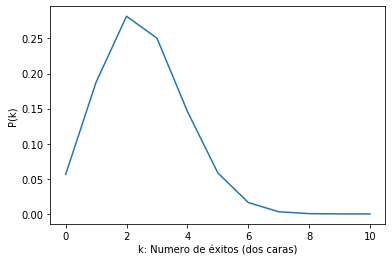

In [3]:
k=list(range(11))
plt.plot(k,binom(10,0.25).pmf(k))
plt.xlabel('k: Numero de éxitos (dos caras)')
plt.ylabel('P(k)')
plt.show()

****

### Ejercicio 2

Es un dia normal del laboratorio, cuando revisando el depósito de muestras encuentras una caja de dos mil capacitores, la cual perdió su etiqueta. Preguntando a los colegas, te dicen que siempre los clasificaron según su capacitancia en tres categorías $C_1 = 50nF$ ,$C_2=80nF$ y $C_3=110nF$, con una desviación estándar característica de $\sigma=10nF$ igual para las tres. 

Determinado a no desperdiciar los dos mil capacitores, medís diez de ellos en tu tiempo libre encontrando los siguientes valores:
$$X = \{110.6,  99.3,  82.5, 100.1, 90.1,  83.3,  99.8, 101.9, 78.4,  97.3\}$$

**a.** Modelando la distribucion de probabilidad de la capacitancia de un capacitor de la categoria $i$ como $\mathcal{N} (\mu=C_i, \sigma=10nF)$, y sin dar preferencia a ninguna de las tres, encuentre a qué categoría pertenece la caja hallada. Para esto
* *i*. Escriba la verosimilitud de obtener las mediciones $X$ dada cada categoría $i=1,2,3$, y el prior sobre las 3 categorías. Justifique su elección.

* *ii*. Calcule el posterior y a partir de él diga a cual categoría infiere que la caja pertenece, y con qué confianza asegura esto.

In [4]:
X = np.array([110.6, 99.3, 82.5, 100.1, 90.1, 83.3, 99.8, 101.9, 78.4, 97.3])

Cada categoría tiene una distribución normal de capacitancias de sus capacitores. Por lo tanto, $P(X | i) = \mathcal{N}(X, \mu=C_i, \sigma=10nF)$. El prior sobre las categorías $i$ es uniforme, para no dar preferencia a ninguna, es decir $P_i = 1/3$ para las tres categorías. El teorema de bayes se escribe como 
$$ P(i| X) = \frac{P(X|i) P_i}{P(X)} \propto \mathcal{N}(X, C_i, \sigma) \frac{1}{3} \propto \prod_{x\in X}\mathcal{N}(x, C_i, \sigma)$$
Como las mediciones son independientes, la normal sobre $X$ es el producto de las normales sobre cada $x\in X$.

 P(1|X) = 0.00 %
 P(2|X) = 88.18 %
 P(3|X) = 11.82 %



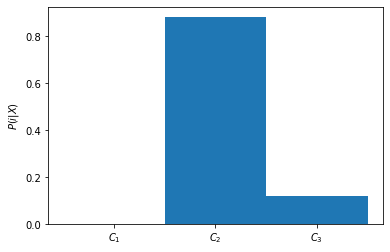

In [5]:
from scipy.stats import norm
sigma=10
C = [50,80,110]
verosimilitud = np.array([ norm(loc=C[i], scale=sigma).pdf(X).prod() for i in range(3)])
prior = 1/3
evidencia = (prior*verosimilitud).sum()
posterior = verosimilitud*prior/evidencia

plt.bar(C,posterior,width=30)
plt.xticks(C,["$C_1$", "$C_2$", "$C_3$"])
plt.ylabel('$P(i | X)$')
print(" P(1|X) = {:.2f} %\n P(2|X) = {:.2f} %\n P(3|X) = {:.2f} %\n".format((posterior*100)[0],(posterior*100)[1],(posterior*100)[2]))

Concluyo que las muestras pertenecen a la segunda categoría con un 88% de confianza, mientras que tengo un 12% de confianza en que pertenezcan a la tercera.

**b.** A raíz de una discrepancia en el laboratorio sobre la existencia de una antigua cuarta categoría, ahora en desuso, de capacitancia media $C_4$ desconocida, te propones inferir a partir de tus mediciones la capacitancia  media $C_{D}$ de la categoría a la cual pertenecen (es decir, modelando la distribución de capacitancias como  $N(\mu=C_D, \sigma=10nF)$ te propones inferir $C_D$). 
 

* *i*. Calcule la distribucion posterior de capacitancias medias $C_D$ sin asumir ahora que existen unicamente las tres categorias analizadas en el item a). Para eso, utilice el hecho de que el prior conjugado sobre $C_D$ de una verosimlitud normal de media $C_D$ es también la distribución normal. Implemente como prior una normal centrada en $80.0$  con desviación estándar $40.0$. (*Puede realizar este cálculo tanto analíticamente como numéricamente*)

* *ii*. Grafique el posterior y diga qué concluye a partir de este. Calcule la probabilidad de que $C_D \in [90,100]$.

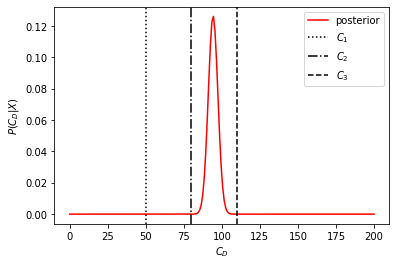

P(C_D \in [90,100]) = 88.09%


In [6]:
#analiticamente
mu0=80
sigma0=40
sigma=10

sigmap = np.sqrt(1 / (1/sigma0**2 + len(X)/sigma**2))
mup = (mu0/sigma0**2 + X.sum()/sigma**2) / (1/sigma0**2 + len(X)/sigma**2)

mu=np.linspace(0,200,200)
posterior=norm(mup,sigmap).pdf(mu)
plt.plot(mu, posterior, label='posterior', c='red')
plt.axvline(C[0],linestyle=':', label='$C_1$', c='black')
plt.axvline(C[1],linestyle='-.', label='$C_2$', c='black')
plt.axvline(C[2],linestyle='--' , label='$C_3$', c='black')
plt.legend()
plt.xlabel('$C_D$')
plt.ylabel('$P(C_D | X)$')
plt.show()

print("P(C_D \in [90,100]) = {:.2f}%".format(posterior[(mu >=90)*(mu<=100)].sum()*100*(mu[1]-mu[0])))

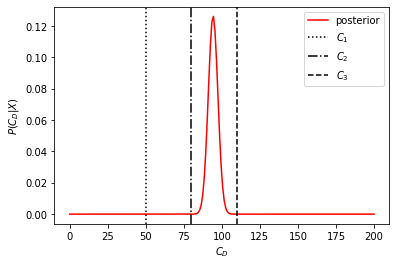

P(C_D \in [90,100]) = 88.09%


In [7]:
#numericamente
mu=np.linspace(0,200,200)
sigma=10
posteriors=[]
posteriors.append( norm(80,40).pdf(mu) )

for x in X:
    prior = posteriors[-1]
    verosimilitud = norm(mu,sigma).pdf(x)
    posterior = prior*verosimilitud
    evidencia = posterior.sum()*(mu[1]-mu[0])
    posterior/=evidencia
    posteriors.append(posterior)

plt.plot(mu, posterior, label='posterior', c='red')
plt.axvline(C[0],linestyle=':', label='$C_1$', c='black')
plt.axvline(C[1],linestyle='-.', label='$C_2$', c='black')
plt.axvline(C[2],linestyle='--' , label='$C_3$', c='black')
plt.legend()
plt.xlabel('$C_D$')
plt.ylabel('$P(C_D | X)$')
plt.show()

print("P(C_D \in [90,100]) = {:.2f}%".format(posterior[(mu >=90)*(mu<=100)].sum()*100*(mu[1]-mu[0])))

Concluimos, por la simetría que tiene entre las categorías 2 y 3, que probablemente sea una nueva categoría con $C_D= 95nF$, o sino una mezcla entre las categorías 2 y 3. 

****

### Ejercicio 3

Se tiene una serie de datos sobre la relación entre el precio de un commodity y la estupidez de algún lider internacional. Esto último, se mide con un "índice de estupidez" que va entre cero y uno.
Un grupo de expertxs decide modelar esta relación para adelantarse ante un posible aumento inesperado de la estupidez del líder.

Después de cuatro horas de deliberación, lxs expertxs deciden utilizar un *modelo lineal con funciones de base polinomiales* para ajustar los datos. Pero no logran decidirse sobre el orden del polinomio a utilizar. Ud. puede ayudarlxs.

In [ ]:
# Corran esta celda solo si están en Colab y no subieron los datos a mano
!wget https://raw.githubusercontent.com/exord/UNSAM_IA/master/datasets/price_vs_stupidity.csv

In [8]:
# Corran esta celda para leer los datos.
df = pd.read_csv('price_vs_stupidity.csv')
df.head()

,stupidity_index,commodity_price
0,0.588476,4.803550
1,0.290299,5.635355
2,0.654555,4.285732
3,0.489105,5.244887
4,0.783530,3.215176


**a.** Grafique los datos. (*Ayuda*: use las clases de <tt>matplotlib.pyplot</tt> o los métodos del <tt>DataFrame</tt> de <tt>pandas</tt>).

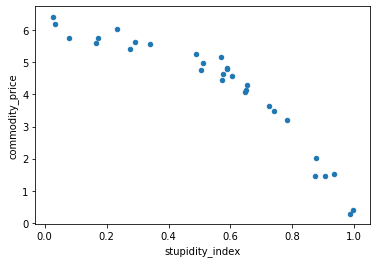

In [9]:
df.plot(x='stupidity_index', y='commodity_price',kind='scatter')
plt.show()

**b.** Separe 20% de los datos para usar como conjunto de testeo. Los datos están repartidos de forma aleatoria.
A partir de este punto, trabaje solamente con el conjunto de entrenamiento.

In [10]:
datos = df.to_numpy()
n = int(0.8*len(datos))
X_train= datos[:int(n),0]
Y_train= datos[:int(n),1]

X_test= datos[int(n):,0]
Y_test= datos[int(n):,1]

**c.** El jefe del grupo de los expertos cree que el mejor modelo es un polinomio de grado dos. Dele el gusto:

* *i.* Encuentre los parámetros de este modelo. Calcule el error cuadrático medio.

* *ii.* Grafique sobre los datos la predicción del modelo.

Modelo del Jefe:
---------------
Parámetros:
w0 = 5.654385176430463
w1 = 2.830150192425207
w2 = -8.02528117657531
RMSQ esperado: 0.30429


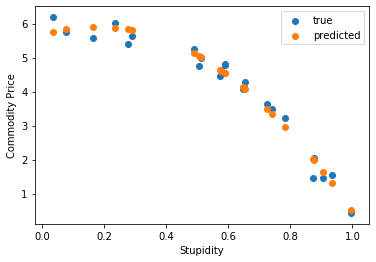

In [11]:
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as pp
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

print("Modelo del Jefe:\n"+15*'-')

model_jefe = Pipeline([
    ('poly', pp.PolynomialFeatures(degree=2)),
    ('regresion', LinearRegression())
])


model_jefe.fit(X_train.reshape(-1,1), Y_train)
pred = model_jefe.predict(X_train.reshape(-1,1))

intercept = model_jefe.named_steps['regresion'].intercept_
weights = model_jefe.named_steps['regresion'].coef_
print("Parámetros:\nw0 = {}\nw1 = {}\nw2 = {}".format(intercept,weights[1], weights[2]))
print("RMSQ esperado: {:.5f}".format(-np.mean(cross_val_score(model_jefe,X_train.reshape(-1,1),Y_train, scoring='neg_root_mean_squared_error'))))

plt.scatter(X_train,Y_train, label='true')
plt.scatter(X_train,pred, label='predicted')
plt.xlabel('Stupidity')
plt.ylabel('Commodity Price')
plt.legend()
plt.show()

**d.** ¿Qué método usaría para encontrar el órden óptimo del ajuste polinomial? Justifique. 

Validación cruzada en el training set, usando k-folding, para calcular la performance esperada de cada modelo. Con ello comparar y elegir la que de mejor score.

**e.** Use el método descripto arriba para encontrar el mejor orden polinomial. Haga un gráfico que justifique su elección (RMSE vs. orden del polinomio, por ejemplo). Grafique la predicción del modelo óptimo sobre los datos. (*Ayuda (obvia)*: use las funciones del paquete <tt>sklearn.model_selection</tt>). 

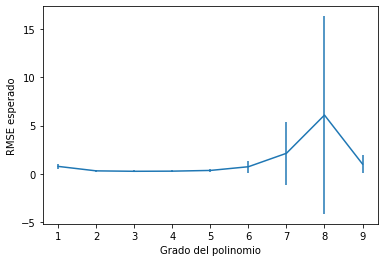

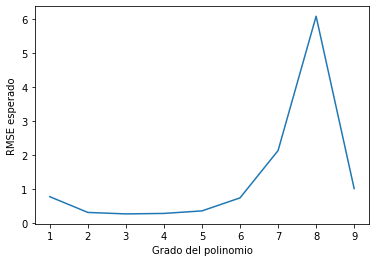

El mejor modelo es el polinomio de grado: 3
Con RMSQ esperado: 0.26034


In [12]:
mean_score=[]
std_score=[]
for M in range(1,10):
    model_poly = Pipeline([
        ('poly', pp.PolynomialFeatures(degree=M)),
        ('regresion', LinearRegression())
    ])
    score=cross_val_score(model_poly, X_train.reshape(-1,1), Y_train, scoring='neg_root_mean_squared_error')
    mean_score.append(-score.mean())
    std_score.append(score.std())

plt.errorbar(range(1,10),mean_score,std_score)
plt.xlabel('Grado del polinomio')
plt.ylabel('RMSE esperado')
plt.show()
#Sin errores quizas se ve mejor
plt.plot(range(1,10),mean_score)
plt.xlabel('Grado del polinomio')
plt.ylabel('RMSE esperado')
plt.show()
print("El mejor modelo es el polinomio de grado: {}".format(np.argmin(mean_score)+1))
print("Con RMSQ esperado: {:.5f}".format(np.min(mean_score)))


mínimo RMSQ esperado: 0.26034
Para hiperparámetros {'poly__degree': 3}


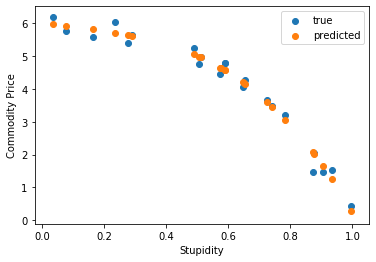

In [14]:
#Aca va lo mismo, usando GridSearchCV para que lo miren
from sklearn.model_selection import GridSearchCV

model_poly = Pipeline([
    ('poly', pp.PolynomialFeatures()),
    ('regresion', LinearRegression())
])

param_grid = {
    'poly__degree': [1,2,3,4,5,6,7,8,9,10],
}

search = GridSearchCV(model_poly, param_grid, scoring='neg_root_mean_squared_error')
search.fit(X_train.reshape(-1,1), Y_train)


print("mínimo RMSQ esperado: {:.5f}".format(-search.best_score_))
print("Para hiperparámetros {}".format(search.best_params_))

pred = search.predict(X_train.reshape(-1,1))
plt.scatter(X_train,Y_train, label='true')
plt.scatter(X_train,pred, label='predicted')
plt.xlabel('Stupidity')
plt.ylabel('Commodity Price')
plt.legend()
plt.show()

**f.** Implemente un modelo más complejo y use alguna técnica de regularización. Use validación cruzada para encontrar el valor del parámetro de regularización. Grafique la predicción del modelo sobre los datos.

mínimo RMSQ esperado: 0.23744
Para hiperparámetros {'poly__degree': 10, 'regresion__alpha': 0.016681005372000592}


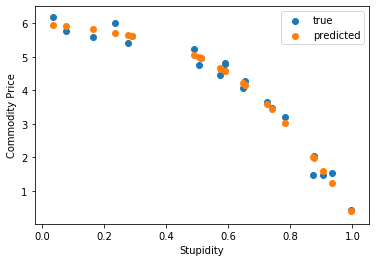

In [15]:
from sklearn.linear_model import Ridge

model_poly = Pipeline([
    ('poly', pp.PolynomialFeatures()),
    ('regresion', Ridge())
])

param_grid = {
    'poly__degree': range(20),
    'regresion__alpha': np.logspace(-2,0,10),
}

search = GridSearchCV(model_poly, param_grid, scoring='neg_root_mean_squared_error')
search.fit(X_train.reshape(-1,1), Y_train)


print("mínimo RMSQ esperado: {:.5f}".format(-search.best_score_))
print("Para hiperparámetros {}".format(search.best_params_))

pred = search.predict(X_train.reshape(-1,1))
plt.scatter(X_train,Y_train, label='true')
plt.scatter(X_train,pred, label='predicted')
plt.xlabel('Stupidity')
plt.ylabel('Commodity Price')
plt.legend()
plt.show()

**g.** Calcule la performance sobre el conjunto de test. Calcule la predicción para el modelo óptimo para un índice de estupidez 1.1.

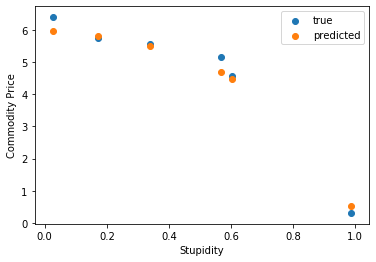

RMSQ en el Test set: 0.08335

Predicción para stupidity = 1.1 : [-0.65869484]


In [16]:
#El modelo polinomico de grado 10 con regularizacion calculado recien fue el mejor modelo
#con un RMSE esperado de 0.24 (en comparacion a 0.26 para una cubica o 0.30 para la cuadratica)
from sklearn.metrics import mean_squared_error

best_model = Pipeline([
    ('poly', pp.PolynomialFeatures(degree=10)),
    ('regresion', Ridge(alpha=0.016681005372000592))
])
best_model.fit(X_train.reshape(-1,1),Y_train)
pred = best_model.predict(X_test.reshape(-1,1))

plt.scatter(X_test,Y_test, label='true')
plt.scatter(X_test,pred, label='predicted')
plt.xlabel('Stupidity')
plt.ylabel('Commodity Price')
plt.legend()
plt.show()
print("RMSQ en el Test set: {:.5f}".format(mean_squared_error(Y_test,pred)))

print("\nPredicción para stupidity = 1.1 : {}".format(best_model.predict([[1.1]])))